In [32]:
library(caret)
library(pacman)
pacman::p_load(RWeka, stringr,MASS)

In [18]:
model<- read.csv("C:\\Users\\nikhi\\Documents\\data mining\\Train.csv")
head(model)
names(model)

x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x53,x54,x55,x56,x57,x58,x59,x60,x61,y
0,404,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,beta,0,0,-1
0,404,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,beta,1,0,-1
0,303,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,alpha,0,0,-1
0,454,1,0,0,0,0,0,0,0,...,1,1,0,0,0,1,beta,0,0,-1
0,454,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,beta,0,1,1
0,383,1,1,0,0,0,0,0,0,...,1,0,0,0,1,0,alpha,0,0,-1


[1] "x1"  "x2"  "x3"  "x4"  "x5"  "x6"  "x7"  "x8"  "x9"  "x10" "x11" "x12"
[13] "x13" "x14" "x15" "x16" "x17" "x18" "x19" "x20" "x21" "x22" "x23" "x24"
[25] "x25" "x26" "x27" "x28" "x29" "x30" "x31" "x32" "x33" "x34" "x35" "x36"
[37] "x37" "x38" "x39" "x40" "x41" "x42" "x43" "x44" "x45" "x46" "x47" "x48"
[49] "x49" "x50" "x51" "x52" "x53" "x54" "x55" "x56" "x57" "x58" "x59" "x60"
[61] "x61" "y"

In [25]:
summary(model)
dim(model)

       x1                x2              x3               x4        
 Min.   :0.00000   Min.   : 20.0   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.00000   1st Qu.:404.0   1st Qu.:1.0000   1st Qu.:0.0000  
 Median :0.00000   Median :404.0   Median :1.0000   Median :0.0000  
 Mean   :0.03785   Mean   :408.6   Mean   :0.8438   Mean   :0.1131  
 3rd Qu.:0.00000   3rd Qu.:454.0   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :1.00000   Max.   :999.0   Max.   :1.0000   Max.   :1.0000  
       x5               x6                x7                x8         
 Min.   :0.0000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.0000   Median :0.00000   Median :0.00000   Median :0.00000  
 Mean   :0.2377   Mean   :0.02135   Mean   :0.05337   Mean   :0.04998  
 3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.00000   Max.   :1.00000  
       x9    

[1] 2061   62

In [21]:
validationindex<- createDataPartition(model$y, p=0.8, list=FALSE)
validation<- model[-validationindex, ]
training<- model[validationindex, ]

In [23]:
head(training)
head(validation)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x53,x54,x55,x56,x57,x58,x59,x60,x61,y
1,0,404,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,beta,0,0,-1
2,0,404,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,beta,1,0,-1
3,0,303,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,alpha,0,0,-1
5,0,454,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,beta,0,1,1
6,0,383,1,1,0,0,0,0,0,0,...,1,0,0,0,1,0,alpha,0,0,-1
7,0,404,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,alpha,1,1,1


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x53,x54,x55,x56,x57,x58,x59,x60,x61,y
4,0,454,1,0,0,0,0,0,0,0,...,1,1,0,0,0,1,beta,0,0,-1
10,0,404,1,0,0,0,0,0,0,0,...,1,0,0,1,0,1,alpha,0,0,-1
12,1,404,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,alpha,1,0,-1
15,0,505,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,beta,0,0,1
17,0,283,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,alpha,0,0,-1
26,0,706,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,beta,0,1,-1


3. Summarize Dataset

Now it is time to take a look at the data.

In this step we are going to take a look at the data a few different ways:

Dimensions of the dataset.
Types of the attributes.
Peek at the data itself.
Levels of the class attribute.
Breakdown of the instances in each class.
Statistical summary of all attributes.

3.1 Dimensions of Dataset

We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the dim function.

In [26]:
# split input and output
x <- dataset[,1:61]
y <- dataset[,62]

ERROR: Error in eval(expr, envir, enclos): object 'dataset' not found


In [27]:
# split input and output
x <- training[,1:4]
y <- training[,5]

In [28]:
# split input and output
x <- training[,1:61]
y <- training[,62]

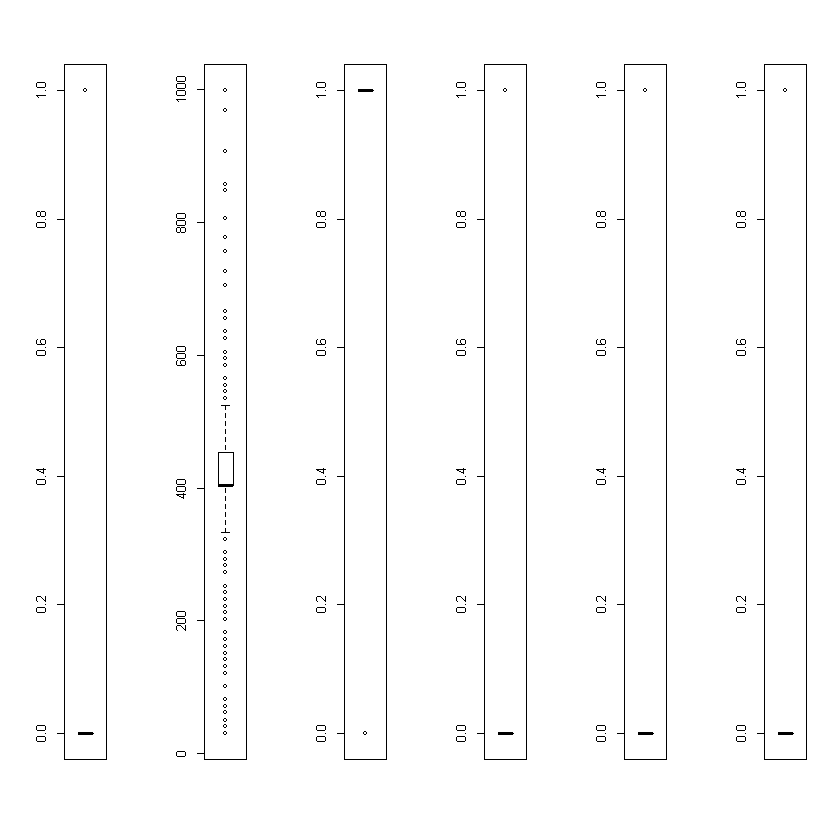

In [37]:
# boxplot for each attribute on one image
par(mfrow=c(1,6))
  for(i in 1:6) {
  boxplot(x[,i])
}

In [30]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

In [39]:

set.seed(7)
fit.cart <- train(y~., data=training, method="rpart", trControl=control)
# kNN
set.seed(7)
fit.knn <- train(y~., data=training, method="knn", trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(y~., data=training, method="svmRadial", trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(y~., data=training, method="rf", trControl=control)

Warning message in train.default(x, y, weights = w, ...):
"You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column."Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."Warning message in train.default(x, y, weights = w, ...):
"You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column."Loading required package: kernlab
Warning message:
"package 'kernlab' was built under R version 3.3.2"
Attaching package: 'kernlab'

The following object is masked from 'package:ggplot2':

    alpha

Warning message in train.default(x, y, weights = w, ...):
"You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level fa

In [40]:
# summarize accuracy of models
results <- resamples(list(cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: cart, knn, svm, rf 
Number of resamples: 10 

RMSE 
       Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
cart 0.6750  0.7045 0.7331 0.7329  0.7580 0.7851    0
knn  0.7222  0.7335 0.7459 0.7684  0.7713 0.8850    0
svm  0.6975  0.7168 0.7675 0.7681  0.7952 0.8695    0
rf   0.6067  0.6488 0.6592 0.6603  0.6758 0.7014    0

Rsquared 
        Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
cart 0.11770  0.2019 0.2287 0.2603  0.3458 0.3945    0
knn  0.09556  0.1651 0.2166 0.1966  0.2353 0.2577    0
svm  0.16940  0.2071 0.2301 0.2272  0.2411 0.2770    0
rf   0.25900  0.3571 0.4012 0.3946  0.4486 0.4633    0


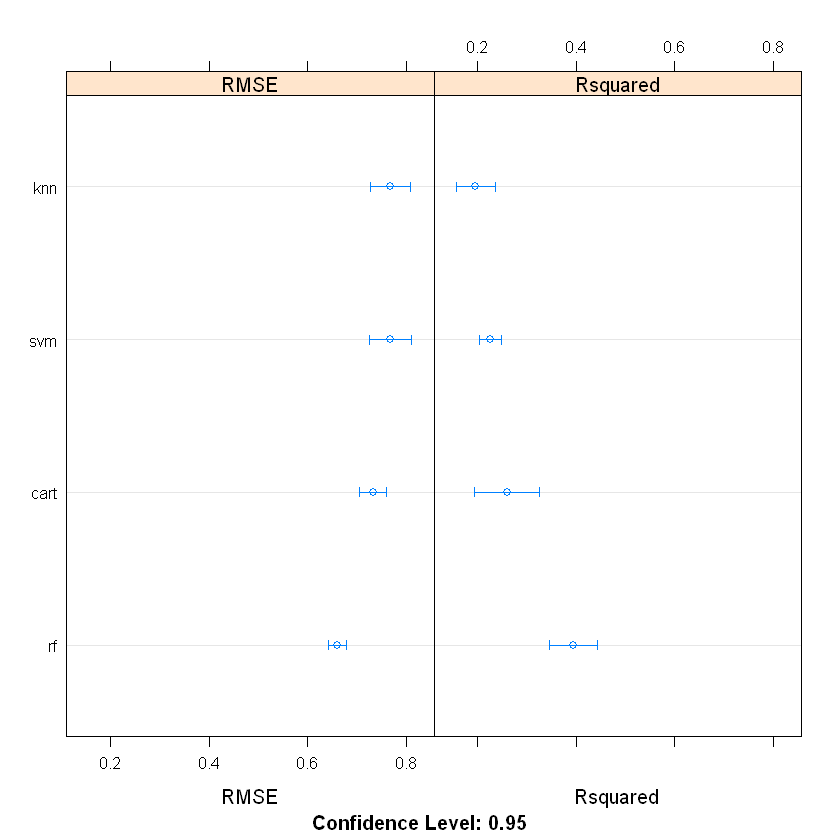

In [41]:
dotplot(results)